In [1]:
import numpy as np 
import pandas as pd 
#
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os
#
from IPython.display import display
import gc                                                           #memory management
#
import seaborn as sns
#
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#setting styles and aesthetics
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,8)
#
sns.set_style('darkgrid')
#
pd.set_option('display.max_columns', 100)
pd.options.display.max_rows=50
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
test = pd.read_csv("Test.csv")
train = pd.read_csv("Train.csv")
print('Test data shape: {} Rows, {} Columns'.format(*test.shape))
#
display(test.head(3))
display(test.tail(3))

Test data shape: 1601 Rows, 22 Columns


,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
0,tour_1,AUSTRALIA,45-64,Spouse,1.00,1.00,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,10,3,Cash,Yes,Wildlife
1,tour_100,SOUTH AFRICA,25-44,Friends/Relatives,0.00,4.00,Business,Wildlife tourism,Tanzania Mission Abroad,Package Tour,Yes,Yes,No,No,No,No,No,13,0,Cash,No,"Wonderful Country, Landscape, Nature"
2,tour_1001,GERMANY,25-44,Friends/Relatives,3.00,0.00,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,7,14,Cash,No,No comments


,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
1598,tour_992,FINLAND,25-44,Alone,0.00,1.00,Meetings and Conference,Mountain climbing,"Friends, relatives",Independent,No,No,No,No,No,No,No,6,0,Cash,Yes,No comments
1599,tour_996,SOUTH AFRICA,24-Jan,Alone,0.00,1.00,Business,Beach tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,4,0,Cash,Yes,Wildlife
1600,tour_998,SOUTH AFRICA,25-44,Spouse,1.00,1.00,Leisure and Holidays,Cultural tourism,"Radio, TV, Web",Independent,No,No,No,No,No,No,No,9,5,Cash,Yes,Friendly People


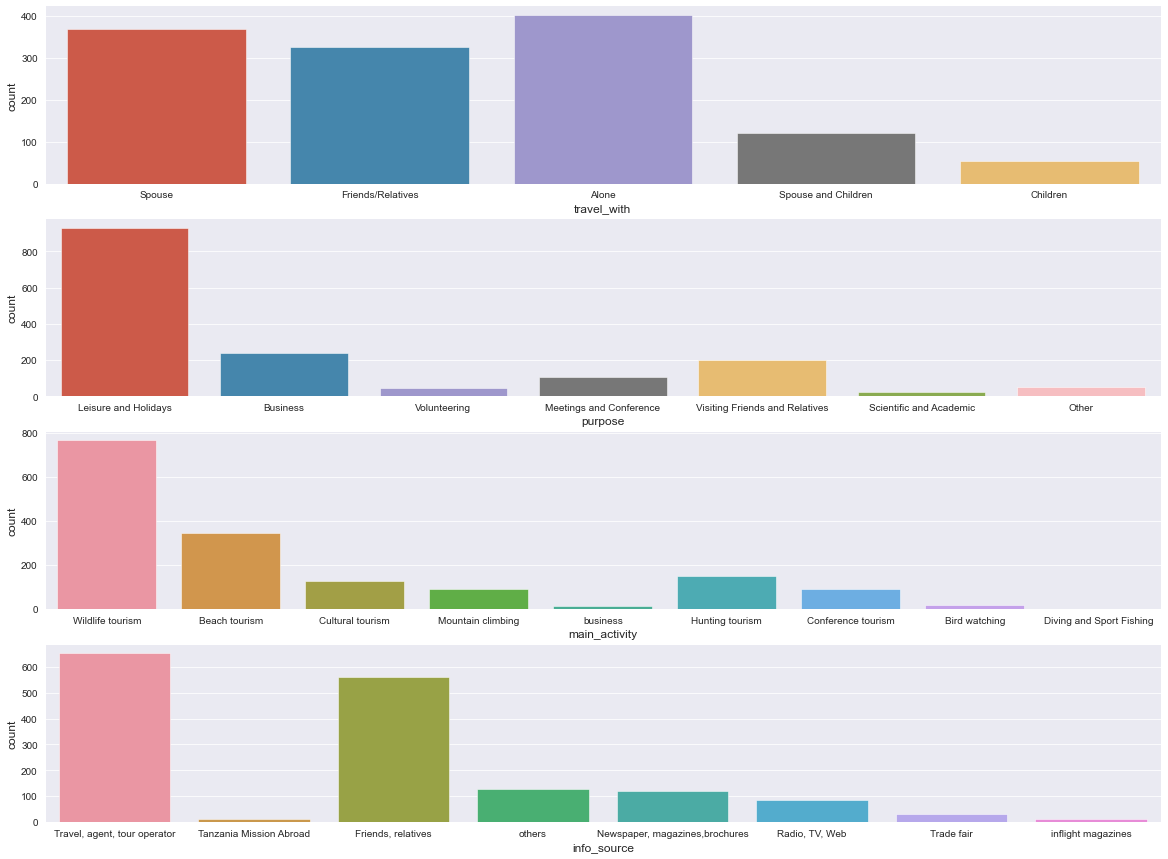

In [4]:
fig, ax = plt.subplots(4,1)
fig.set_size_inches(20, 15)
sns.countplot(test['travel_with'], ax=ax[0])
sns.countplot(test['purpose'], ax=ax[1])
sns.countplot(test['main_activity'], ax=ax[2])
sns.countplot(test['info_source'], ax=ax[3])
sns.despine()
fig.show()

In [5]:
display("test data")
display(test.dtypes.value_counts())

'test data'

object     18
int64       2
float64     2
dtype: int64

In [6]:
#train data pandas profiling
from pandas_profiling import ProfileReport
#
#test data pandas profiling
profile = ProfileReport(test)
profile.to_file(output_file='Test_Profiling_Report.html')

Summarize dataset:   0%|          | 0/35 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
#column/variable names
display("Test data")
display(test.columns)

'Test data'

Index(['ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'payment_mode', 'first_trip_tz', 'most_impressing'],
      dtype='object')

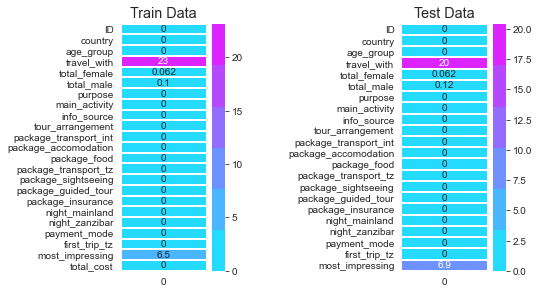

In [8]:
plt.figure(figsize=(12,10))

plt.subplot(231)
sns.heatmap(pd.DataFrame(train.isnull().sum()/train.shape[0]*100),annot=True,
            cmap=sns.color_palette("cool"),linewidth=1,linecolor="white")
plt.title("Train Data")

plt.subplot(232)
sns.heatmap(pd.DataFrame(test.isnull().sum()/test.shape[0]*100),annot=True,
            cmap=sns.color_palette("cool"),linewidth=1,linecolor="white")
plt.title("Test Data")

plt.subplots_adjust(wspace = 1.6)

In [9]:
test.travel_with.fillna('None',inplace=True)
test.total_female.fillna(test.total_female.mean(),inplace = True)
test.total_male.fillna(test.total_male.mean(),inplace = True)
test.most_impressing.fillna('None', inplace = True)

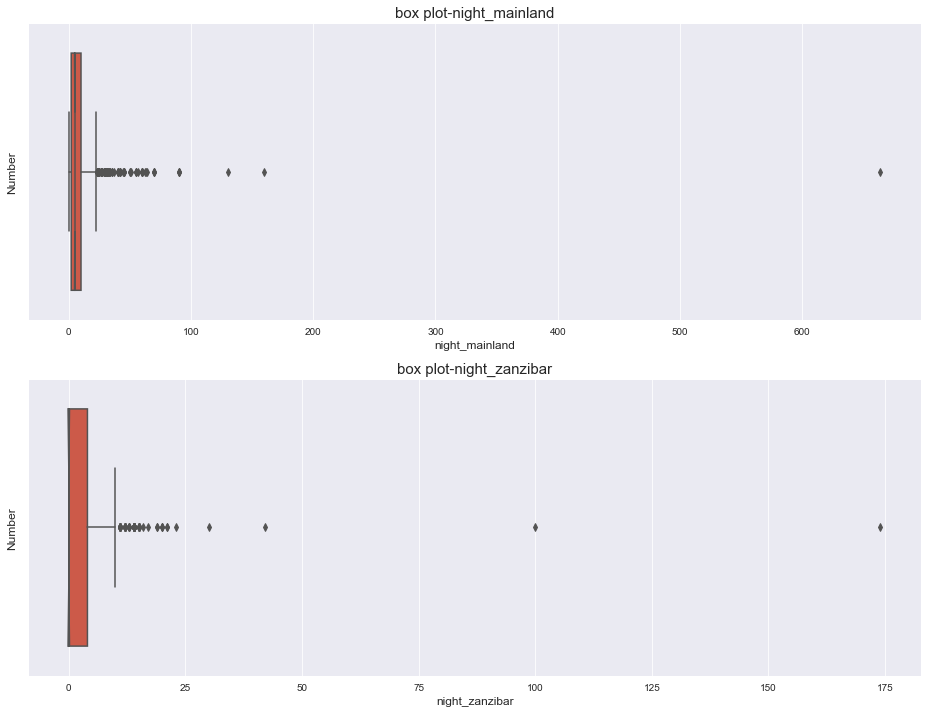

In [10]:
#checking for outliers using box plot
col_names = ['night_mainland', 'night_zanzibar']
fig, ax=plt.subplots(len(col_names), figsize=(16,12))
for i, col_val in enumerate(col_names):
    sns.boxplot(test[col_val], notch= True, ax=ax[i])
    ax[i].set_title ('box plot-'+ col_val, fontsize= 15)
    ax[i].set_xlabel(col_val, fontsize= 12)
    ax[i].set_ylabel('Number', fontsize= 12)

plt.show()  

### Feature Engineering

In [11]:
test.drop_duplicates(subset=test.columns, keep='last', inplace=True)

### Numerical Variables

In [12]:
#define a function for treating outliers
def treat_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print('First quantile: ', Q1)
    print('Third quantile: ', Q3)
    print('IQR: ', IQR)
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    print('Lower bound: ', lower_bound, 'Upper bound: ', upper_bound)

**1. Night Mainland**

In [13]:
treat_outlier(test, 'night_mainland')

First quantile:  2.0
Third quantile:  10.0
IQR:  8.0
Lower bound:  -10.0 Upper bound:  22.0


In [14]:
test = test[(test['night_mainland'] > -10.0) & (test['night_mainland'] < 22.0)]

**2. Night Zanzibar**

In [15]:
treat_outlier(test, 'night_zanzibar')

First quantile:  0.0
Third quantile:  4.0
IQR:  4.0
Lower bound:  -6.0 Upper bound:  10.0


In [16]:
test = test[(test['night_zanzibar'] > -6.0) & (test['night_zanzibar'] < 10.0)]

In [17]:
#encode string variables 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#
test['age_group'] = le.fit_transform(test['age_group'])
test['package_transport_int'] = le.fit_transform(test['package_transport_int'])
test['package_accomodation'] = le.fit_transform(test['package_accomodation'])
test['package_food'] = le.fit_transform(test['package_food'])
test['package_transport_tz'] = le.fit_transform(test['package_transport_tz'])
test['package_sightseeing'] = le.fit_transform(test['package_sightseeing'])
test['package_guided_tour'] = le.fit_transform(test['package_guided_tour'])
test['package_insurance'] = le.fit_transform(test['package_insurance'])
test['first_trip_tz'] = le.fit_transform(test['first_trip_tz'])
test['country'] = le.fit_transform(test['country'])

In [18]:
columns_to_transform = ['tour_arrangement','travel_with','purpose','main_activity','info_source','most_impressing','payment_mode']
test = pd.get_dummies( test, columns = columns_to_transform, drop_first=True)
#
display(test.head(3))
display(test.tail(3))

,ID,country,age_group,total_female,total_male,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,tour_arrangement_Package Tour,travel_with_Children,travel_with_Friends/Relatives,travel_with_None,travel_with_Spouse,travel_with_Spouse and Children,purpose_Leisure and Holidays,purpose_Meetings and Conference,purpose_Other,purpose_Scientific and Academic,purpose_Visiting Friends and Relatives,purpose_Volunteering,main_activity_Bird watching,main_activity_Conference tourism,main_activity_Cultural tourism,main_activity_Diving and Sport Fishing,main_activity_Hunting tourism,main_activity_Mountain climbing,main_activity_Wildlife tourism,main_activity_business,"info_source_Newspaper, magazines,brochures","info_source_Radio, TV, Web",info_source_Tanzania Mission Abroad,info_source_Trade fair,"info_source_Travel, agent, tour operator",info_source_inflight magazines,info_source_others,most_impressing_Excellent Experience,most_impressing_Friendly People,most_impressing_Good service,most_impressing_No comments,most_impressing_None,most_impressing_Satisfies and Hope Come Back,"most_impressing_Wonderful Country, Landscape, Nature",payment_mode_Credit Card,payment_mode_Other,payment_mode_Travellers Cheque
0,tour_1,1,2,1.00,1.00,1,1,1,1,1,1,1,10,3,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,tour_100,65,1,0.00,4.00,1,1,0,0,0,0,0,13,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,tour_1006,10,0,2.00,0.00,0,0,0,0,0,0,0,0,4,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


,ID,country,age_group,total_female,total_male,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,tour_arrangement_Package Tour,travel_with_Children,travel_with_Friends/Relatives,travel_with_None,travel_with_Spouse,travel_with_Spouse and Children,purpose_Leisure and Holidays,purpose_Meetings and Conference,purpose_Other,purpose_Scientific and Academic,purpose_Visiting Friends and Relatives,purpose_Volunteering,main_activity_Bird watching,main_activity_Conference tourism,main_activity_Cultural tourism,main_activity_Diving and Sport Fishing,main_activity_Hunting tourism,main_activity_Mountain climbing,main_activity_Wildlife tourism,main_activity_business,"info_source_Newspaper, magazines,brochures","info_source_Radio, TV, Web",info_source_Tanzania Mission Abroad,info_source_Trade fair,"info_source_Travel, agent, tour operator",info_source_inflight magazines,info_source_others,most_impressing_Excellent Experience,most_impressing_Friendly People,most_impressing_Good service,most_impressing_No comments,most_impressing_None,most_impressing_Satisfies and Hope Come Back,"most_impressing_Wonderful Country, Landscape, Nature",payment_mode_Credit Card,payment_mode_Other,payment_mode_Travellers Cheque
1598,tour_992,24,1,0.00,1.00,0,0,0,0,0,0,0,6,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1599,tour_996,65,0,0.00,1.00,0,0,0,0,0,0,0,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1600,tour_998,65,1,1.00,1.00,0,0,0,0,0,0,0,9,5,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [19]:
## convert float dtypes to int
test["total_female"] = test['total_female'].astype('int')
test["total_male"] = test['total_male'].astype('int')
test["night_mainland"] = test['night_mainland'].astype('int')
test["night_zanzibar"] = test['night_zanzibar'].astype('int')

In [20]:
#feature engineering
test["total_persons"] = test["total_female"] + test["total_male"]
#
test["total_nights_spent"] = test["night_mainland"] + test["night_zanzibar"]
#
int_cols = ["night_mainland", "night_zanzibar", "total_female", "total_male", "total_persons", "total_nights_spent"]
for col in int_cols:
    freq = test[col].value_counts().to_dict()
    test[col + '_freq_code'] = test[col].map(freq)

In [21]:
test['night_zanzibar_freq_code'] = le.fit_transform(test['night_zanzibar_freq_code'])
test['night_mainland_freq_code'] = le.fit_transform(test['night_mainland_freq_code'])
test['total_female_freq_code'] = le.fit_transform(test['total_female_freq_code'])
test['total_male_freq_code'] = le.fit_transform(test['total_male_freq_code'])
test['total_persons_freq_code'] = le.fit_transform(test['total_persons_freq_code'])
test['total_nights_spent_freq_code'] = le.fit_transform(test['total_nights_spent_freq_code'])

In [22]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model 
        to generalize and improves the interpretability of the model.

    Inputs: 
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''

    # Dont want to remove correlations between Energy Star Score
    y = x['total_cost']
    x = x.drop(columns = ['total_cost'])

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)

    # Add the score back in to the data
    x['total_cost'] = y

    return x

In [23]:
#check for correlation
pd.options.display.max_rows = 100
#
test['total_cost'] = np.nan
# Remove the collinear features above a specified correlation coefficient
feature = remove_collinear_features(test, 0.7);
feature.shape

package_food | package_accomodation | 0.93
package_transport_tz | package_accomodation | 0.85
package_transport_tz | package_food | 0.83
package_sightseeing | package_accomodation | 0.73
package_guided_tour | package_accomodation | 0.72
package_guided_tour | package_food | 0.71
package_guided_tour | package_sightseeing | 0.79
tour_arrangement_Package Tour | package_transport_int | 0.7
tour_arrangement_Package Tour | package_accomodation | 0.96
tour_arrangement_Package Tour | package_food | 0.92
tour_arrangement_Package Tour | package_transport_tz | 0.85
tour_arrangement_Package Tour | package_sightseeing | 0.7
tour_arrangement_Package Tour | package_guided_tour | 0.72
total_persons | total_female | 0.77
total_persons | total_male | 0.84
total_nights_spent | night_mainland | 0.88
night_mainland_freq_code | night_mainland | 0.86
night_mainland_freq_code | total_nights_spent | 0.73
total_persons_freq_code | total_female | 0.71
total_persons_freq_code | total_persons | 0.76
total_nights_sp

(1402, 51)

In [24]:
#write to csv for variable and model selection 
feature.to_csv('test_clean.csv', index=False)

In [25]:
#######################################################################################################